In [1]:
#网络结构
#输入层：4 个特征
#隐藏层 1：3 个神经元，使用 ReLU 激活函数
#隐藏层 2：2 个神经元，使用 Tanh 激活函数
#输出层：2 个神经元，使用 Softmax 激活函数（用于多分类，输出概率和为 1）

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [27]:
class SimpleNN(nn.Module):
  def __init__(self, w1, w2, w3, b1, b2, b3):
    super().__init__()
    self.layer1 = nn.Linear(4, 3)
    self.layer2 = nn.Linear(3, 2)
    self.layer3 = nn.Linear(2, 2)

    self.layer1.weight.data.copy_(w1)
    self.layer1.bias.data.copy_(b1.flatten())
    self.layer2.weight.data.copy_(w2)
    self.layer2.bias.data.copy_(b2.flatten())
    self.layer3.weight.data.copy_(w3)
    self.layer3.bias.data.copy_(b3.flatten())

  def forward(self, x):
    x = torch.relu(self.layer1(x))
    x = torch.tanh(self.layer2(x))
    x = self.layer3(x)
    return x


epoch: 1 loss: 0.7951
epoch: 101 loss: 0.6389
epoch: 201 loss: 0.6364
epoch: 301 loss: 0.6336
epoch: 401 loss: 0.6283
epoch: 501 loss: 0.6150
epoch: 601 loss: 0.5801
epoch: 701 loss: 0.4814
epoch: 801 loss: 0.2076
epoch: 901 loss: 0.0792
epoch: 1001 loss: 0.0444
epoch: 1101 loss: 0.0301
epoch: 1201 loss: 0.0226
epoch: 1301 loss: 0.0181
epoch: 1401 loss: 0.0151
epoch: 1501 loss: 0.0129
epoch: 1601 loss: 0.0113
epoch: 1701 loss: 0.0100
epoch: 1801 loss: 0.0090
epoch: 1901 loss: 0.0081
epoch: 2001 loss: 0.0074
epoch: 2101 loss: 0.0068
epoch: 2201 loss: 0.0063
epoch: 2301 loss: 0.0059
epoch: 2401 loss: 0.0055
epoch: 2501 loss: 0.0052
epoch: 2601 loss: 0.0049
epoch: 2701 loss: 0.0046
epoch: 2801 loss: 0.0044
epoch: 2901 loss: 0.0042
epoch: 3001 loss: 0.0040
epoch: 3101 loss: 0.0038
epoch: 3201 loss: 0.0036
epoch: 3301 loss: 0.0035
epoch: 3401 loss: 0.0033
epoch: 3501 loss: 0.0032
epoch: 3601 loss: 0.0031
epoch: 3701 loss: 0.0030
epoch: 3801 loss: 0.0029
epoch: 3901 loss: 0.0028
/n the predi

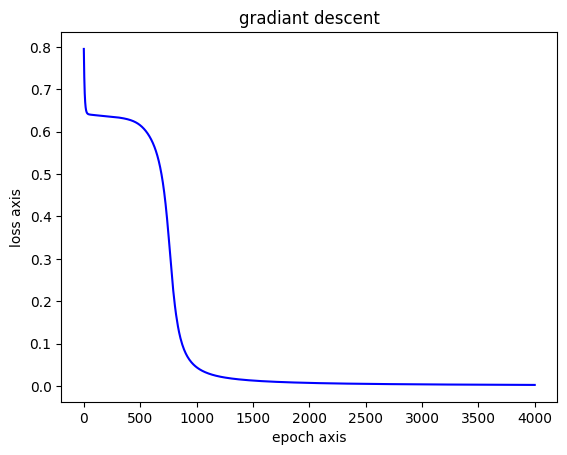

In [45]:
#初始化参数
w1 = torch.tensor([[0.2, 0.3, 0.1, 0.4],
          [0.5, 0.6, 0.7, 0.8],
          [0.9, 0.1, 0.2, 0.3]]).to(device) #shape(3,4)

b1 = torch.tensor([[0.1],
          [0.2],
          [0.3]]).to(device) #shape(3,1)

w2 = torch.tensor([[0.4, 0.5, 0.6],
          [0.7, 0.8, 0.9]]).to(device) #shape (2,3)

b2 = torch.tensor([[0.1],
          [0.2]]).to(device) #shape (2,1)

w3 = torch.tensor([[0.3, 0.4],
          [0.5, 0.6]]).to(device) #shape (2,2)

b3 = torch.tensor([[0.1],
          [0.2]]).to(device)

x= torch.tensor([[0.1, 0.2, 0.3, 0.4],
        [0.5, 0.6, 0.7, 0.8],
        [0.9, 1.0, 0.2, 0.3]]).to(device) #shape (3,4)

y_true = torch.tensor([[1, 0],
            [0, 1],
            [1, 0]]).to(device) #shape (3,2)

y_true_index = torch.argmax(y_true, dim=1).to(device)

model = SimpleNN(w1, w2, w3, b1, b2, b3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr =0.05)

losses = []
epochs = 4000

for epoch in range(epochs):
  y_pred = model(x)

  loss = criterion(y_pred, y_true_index)
  losses.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch%100 == 0:
    print(f"epoch: {epoch + 1}",
      f"loss: {loss.item():.4f}")

with torch.no_grad():
  y_pred = torch.softmax(model(x), dim=1)

print("/n the prediction value is:")
print(y_pred)

print("\n the real value is:")
print(y_true)

y_pred_index = torch.argmax(y_pred, dim=1)
print("\n the index of y_pred is:")
print(y_pred_index)

print("\n the index of y_true is:")
print(y_true_index)

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.title("gradiant descent")
plt.show()